In [1]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

%matplotlib inline

# problem one

## creating a LIF model for a single neuron

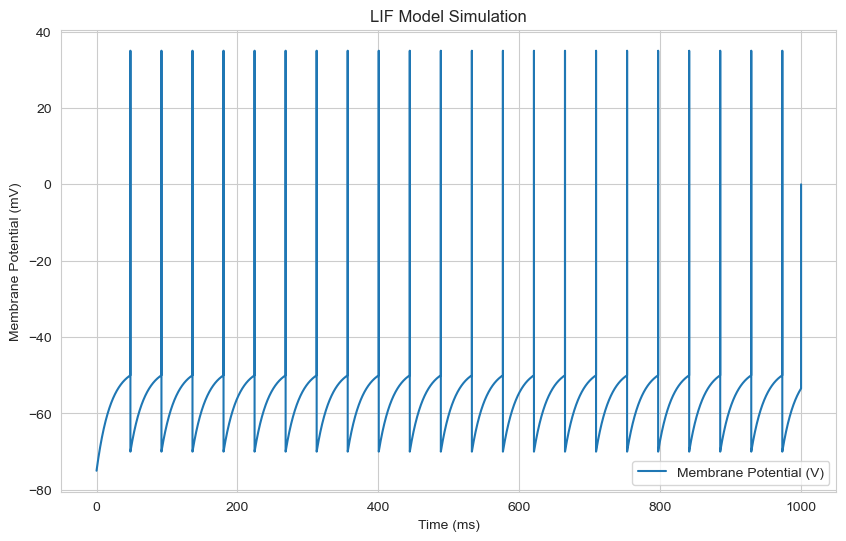

In [3]:
def LIFmodel(amplitude):
    duration = 1000  # Duration of the simulation in ms
    dt = 0.01  # Time step in ms
    v_threshold = -50  # Spike threshold in mV
    v_reset = -70  # Reset potential in mV
    v_rest = -75  # Resting potential in mV
    resistance = 100  # Membrane resistance in MOhm
    capacitance = 0.2005  # Membrane capacitance in nF
    tau = resistance * capacitance  # Membrane time constant in ms

    # Defining time vector
    t = np.arange(0, duration, dt)

    # Initializing voltage and current vectors
    V = np.zeros(len(t))
    V[0] = v_rest  # Initial voltage
    I = np.zeros(len(t))
    I[:] = amp  # Constant input current

    # Simulation
    spikeTimes = []

    for i in range(1, len(t) - 2):
        v_infty = I[i] * resistance + v_rest
        V[i] = v_infty + (V[i-1] - v_infty) * np.exp(-dt/tau)
        if V[i] >= v_threshold:
            V[i-1] = +35
            V[i] = v_reset  # Spike and reset
            spikeTimes.append(t[i])

    return V, I, t, spikeTimes

amp = 0.275  # Amplitude of the current pulse in nanoAmperes (nA)
V, I, t, spikeTimes = LIFmodel(amp)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, V, label='Membrane Potential (V)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('LIF Model Simulation')
plt.legend()
plt.show()